# Importing Necessary Libraries

In [1]:
#required for creating dataframe and array operations
import numpy as np
import pandas as pd

# for visulization pupose
import matplotlib.pyplot as plt
import seaborn as sns

#for variance
from statsmodels.stats.outliers_influence import variance_inflation_factor

#for model splitting and fitting the model
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso


#for evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#to avoid warnings
import warnings
warnings.filterwarnings('ignore')

#for one hot encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import pickle
import json

# 1 Problem Statement

# 2 Data Gathering

In [2]:
df=pd.read_csv("Pune_House_Data.csv")
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


# 3.Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## 1 area_type

In [4]:
df["area_type"].isna().sum()

0

In [5]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
dict_area_type=df["area_type"].value_counts().to_dict()
dict_area_type

{'Super built-up  Area': 8790,
 'Built-up  Area': 2418,
 'Plot  Area': 2025,
 'Carpet  Area': 87}

## 2.availability

In [7]:
df["availability"].isna().sum()

0

In [8]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
dict_availability=df["availability"].value_counts().to_dict()
dict_availability

{'Ready To Move': 10581,
 '18-Dec': 307,
 '18-May': 295,
 '18-Apr': 271,
 '18-Aug': 200,
 '19-Dec': 185,
 '18-Jul': 143,
 '18-Mar': 131,
 '18-Jun': 99,
 '20-Dec': 98,
 '21-Dec': 93,
 '19-Mar': 88,
 '18-Feb': 62,
 '18-Nov': 47,
 '18-Jan': 43,
 '18-Sep': 41,
 '19-Jun': 40,
 '18-Oct': 39,
 '19-Jan': 39,
 '19-Jul': 36,
 '17-Dec': 29,
 '20-Jan': 24,
 '17-Oct': 21,
 '19-Sep': 21,
 '22-Jun': 19,
 '19-Aug': 18,
 '21-Jun': 17,
 '19-Apr': 16,
 'Immediate Possession': 16,
 '20-Aug': 16,
 '19-Oct': 15,
 '21-Mar': 14,
 '17-Jun': 13,
 '21-May': 12,
 '17-Jul': 12,
 '17-Nov': 12,
 '21-Jan': 12,
 '22-Dec': 11,
 '20-Jun': 11,
 '17-Sep': 11,
 '22-May': 10,
 '19-May': 9,
 '17-Aug': 9,
 '21-Jul': 8,
 '17-May': 8,
 '20-Oct': 7,
 '19-Nov': 7,
 '17-Apr': 7,
 '21-Feb': 6,
 '20-Sep': 6,
 '21-Oct': 6,
 '22-Jan': 6,
 '21-Sep': 6,
 '21-Aug': 5,
 '20-Jul': 5,
 '17-Mar': 5,
 '20-Nov': 4,
 '16-Dec': 4,
 '20-Apr': 4,
 '20-May': 4,
 '21-Nov': 3,
 '16-Mar': 3,
 '22-Mar': 3,
 '19-Feb': 3,
 '20-Mar': 2,
 '22-Nov': 2,
 '16

## 3.size

In [10]:
df["size"].isna().sum()

16

In [11]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

## 4.society

In [13]:
df["society"].isna().sum()

5502

In [14]:
df["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [15]:
df["society"].value_counts().to_dict()

{'GrrvaGr': 80,
 'PrarePa': 76,
 'Sryalan': 59,
 'Prtates': 59,
 'GMown E': 56,
 'Prtanha': 51,
 'Bhmesy ': 51,
 'Prityel': 50,
 'PrityTr': 49,
 'Prarkun': 49,
 'Dhalsh ': 47,
 'IBityin': 45,
 'SNity S': 40,
 'Soresea': 39,
 'Adeatlm': 37,
 'Soitya ': 36,
 'Rosha I': 35,
 'Bhe 2ko': 35,
 'SunceEs': 34,
 'SNnia E': 33,
 'JRrnauv': 30,
 'MenueNo': 29,
 'Prlla C': 28,
 'PuandHi': 28,
 'RothaVa': 27,
 'Prncyrn': 27,
 'GoAirej': 26,
 'Aklia R': 26,
 'Raard B': 26,
 'PhestOn': 26,
 'Puachal': 26,
 'DLhtsnd': 24,
 'Dieldli': 24,
 'Itelaa ': 24,
 'Soazak ': 24,
 'Sodgere': 23,
 'ViistLa': 23,
 'Brnia G': 23,
 'PualeSk': 23,
 'Shitt S': 23,
 'Soiewre': 22,
 'Prrtht ': 21,
 'DLhtsan': 21,
 'RInceeg': 21,
 'Brway G': 21,
 'SoechHa': 21,
 'DLhtsen': 20,
 'AsastDe': 20,
 'Eladero': 20,
 'Shthi S': 20,
 'Prersis': 19,
 'Magiaya': 19,
 'Jaades ': 19,
 'Klark L': 19,
 'PueraRi': 18,
 'Brica E': 17,
 'SSestth': 17,
 'SaireSa': 17,
 'Oreldhi': 17,
 'Prensya': 16,
 'KHatsFl': 16,
 'Baowsig': 16,
 'SStham

## 5.total_sqft

In [16]:
df["total_sqft"].isna().sum()

0

In [17]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
df["total_sqft"].value_counts().value_counts().to_dict()

{1: 914,
 2: 311,
 3: 200,
 4: 139,
 5: 94,
 6: 83,
 7: 46,
 9: 35,
 8: 35,
 10: 22,
 13: 18,
 12: 16,
 11: 15,
 18: 14,
 16: 14,
 15: 13,
 21: 12,
 14: 8,
 19: 7,
 25: 6,
 20: 6,
 17: 6,
 31: 5,
 23: 5,
 27: 4,
 24: 4,
 29: 4,
 28: 4,
 32: 4,
 33: 3,
 22: 3,
 37: 3,
 46: 3,
 60: 3,
 30: 3,
 40: 3,
 48: 3,
 35: 2,
 36: 2,
 66: 2,
 38: 2,
 41: 2,
 45: 2,
 52: 2,
 55: 2,
 58: 2,
 101: 2,
 843: 1,
 34: 1,
 221: 1,
 205: 1,
 196: 1,
 180: 1,
 172: 1,
 133: 1,
 123: 1,
 117: 1,
 114: 1,
 112: 1,
 108: 1,
 104: 1,
 91: 1,
 83: 1,
 70: 1,
 69: 1,
 67: 1,
 63: 1,
 62: 1,
 59: 1,
 57: 1,
 56: 1,
 53: 1,
 44: 1,
 43: 1,
 42: 1,
 39: 1}

## 6 bath

In [19]:
df["bath"].isna().sum()

73

In [20]:
df["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

## 7.balcony

In [21]:
df["balcony"].isna().sum()

609

In [22]:
df["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

In [23]:
df["balcony"].value_counts().to_dict()

{2.0: 5113, 1.0: 4897, 3.0: 1672, 0.0: 1029}

## 8.site_location

In [24]:
df["site_location"].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [25]:
df["site_location"].isna().sum()

1

## 9 price(target column)

In [26]:
df["price"].isna().sum()

0

# Outlier detection

<AxesSubplot:>

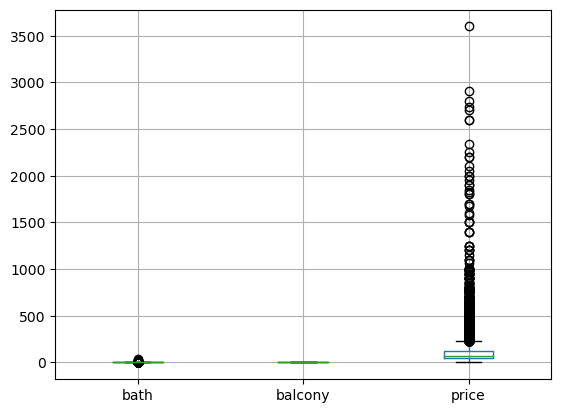

In [27]:
df.boxplot()

# 4 Feature Engineering

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Imputation of Missing Values

## size

In [29]:
df["size"].fillna(df["size"].mode()[0],inplace=True)

In [30]:
df["size"].isna().sum()

0

## total_sqft

In [31]:
df["total_sqft"].replace({'34.46Sq. Meter':370.92,
                          '4125Perch':1123031.25,
                          '1000Sq. Meter':10763.9,
                          '1100Sq. Yards':9900,
                         '5.31Acres':231303.6,
                         '30Acres':np.nan,
                         '716Sq. Meter':7706.96,
                          '547.34 - 827.31':687.325,
                         '1500Sq. Meter':16145.87,
                         '142.61Sq. Meter':1535.04126,
                         '1574Sq. Yards':14166,
                         '1005.03 - 1252.49':1128.76,
                         '361.33Sq. Yards':3251.97,
                         '2249.81 - 4112.19':3181.0,
                         '117Sq. Yards':1053,
                         '3040Sq. Meter':32722.29,
                         '500Sq. Yards':4500,
                         '167Sq. Meter':1797.57,
                         '315Sq. Yards':2835,
                         '3Cents':1306.68,
                         '188.89Sq. Yards':1700.01,
                         '204Sq. Meter':2195.84,
                         '45Sq. Yards':405,
                         '133.3Sq. Yards':1199.7,
                         '78.03Sq. Meter':839.90793,
                         '122Sq. Yards':1098,
                         '84.53Sq. Meter':909.87335,
                         '2.09Acres':91040.4,
                         '24Guntha':24000,
                         '697Sq. Meter':7502.45,
                         '1500Cents':653400,
                         '132Sq. Yards':1188,
                         '2Acres':87120,
                         '1100Sq. Meter':11840.3,
                         '15Acres':653400,
                         '1.26Acres':54885.6,
                         '151.11Sq. Yards':1359.99,
                         '1Grounds':2400.35,
                         '2940Sq. Yards':26460,
                         '45.06Sq. Meter':485.0218,
                         '1.25Acres':54450,
                         '86.72Sq. Meter':933.44631,
                         '38Guntha':38000,
                         '6Acres':261360,
                         '120Sq. Yards':1080,
                         '24Sq. Meter':258.334,
                         '142.84Sq. Meter':1537.51696,
                         '300Sq. Yards':2700,
                         '2100 - 2850':2475.0,
                         '3010 - 3410':3210.0,
                         '2957 - 3450':3203.5,
                         '3067 - 8156':5611.5,
                         '1042 - 1105':1073.5,
                         '1145 - 1340':1242.5,
                         '1015 - 1540':1277.5,
                         '1520 - 1740':1630.0,
                         '1195 - 1440':1317.5,
                         '1200 - 2400':1800,
                         '1120 - 1145':1120,
                         '4400 - 6640':5520,
                         '3090 - 5002':4046.0,
                         '4400 - 6800':5600,
                         '1160 - 1195':1172.5,
                         '4000 - 5249':4624.5,
                         '1115 - 1130':1122.5,
                         '520 - 645':580,
                         '1000 - 1285':1142.5,
                         '3606 - 5091':4348.5,
                         '650 - 665':657.5,
                         '633 - 666':645,
                         '1445 - 1455':1450,
                         '884 - 1116':1000,
                         '850 - 1093':971.5,
                         '1440 - 1884':1662,
                         '580 - 650':615.0,
                         '3425 - 3435':3430,
                         '1804 - 2273':2036.5,
                         '3630 - 3800':3685,
                         '660 - 670':665,
                         '620 - 933':726.5,
                         '2695 - 2940':2820,
                         '2000 - 5634':3817,
                         '3450 - 3472':3461,
                         '1250 - 1305':1277,
                         '670 - 980':720,
                         '1004 - 1204':1100,
                         '645 - 936':750,
                         '2710 - 3360':3035,
                         '3436 - 3643':3500,
                         '2830 - 2882':2856,
                         '596 - 804':700,
                         '1255 - 1863':1559,
                         '1300 - 1405':1352.5,
                         '1500 - 2400':1950,
                         '934 - 1437':1184,
                         '980 - 1030':1005,
                         '1564 - 1850':1707,
                         '1446 - 1506':1476,
                         '1070 - 1315':1192.5,
                         '2806 - 3019':2913,
                         '613 - 648':630,
                         '1430 - 1630':1530,
                         '704 - 730':717,
                         '1482 - 1846':1664,
                         '2805 - 3565':3185,
                         '3293 - 5314':4303.5,
                         '1210 - 1477':1340,
                         '3369 - 3464':3375,
                         '1125 - 1500':1300,
                         '1076 - 1199':1150,
                         '381 - 535':458,
                          '2215 - 2475':2300,
                          '524 - 894':700,
                          '540 - 670':605,
                          '1650 - 2538':2094.0, 
                          '2725 - 3250':2987.5, 
                          '1974 - 2171':2074,
                           '888 - 1290':1087, 
                          '1360 - 1890':1525,
                          '2466 - 2856':2661, 
                          '660 - 700':680,
                           '385 - 440':410, 
                          '2100 - 5405':3752.5, 
                          '770 - 841':805,
                          '1310 - 1615':1460,
                           '1782 - 2000':1900,
                          '1469 - 1766':1620, 
                          '1255 - 1350':1402.5,
                          '870 - 1080':975,
                           '2580 - 2591':2585.5,
                          '2563 - 2733':2673,
                          '605 - 624':615,
                          '4260 - 4408':4335,
                           '1349 - 3324':2336.5, 
                          '3300 - 3335':3317.5, 
                          '1180 - 1630':1405,
                           '1365 - 1700':1532.5,
                          '3500 - 3600':3550,
                          '1482 - 1684':1583,
                           '981 - 1249':1115,
                          '1100 - 1225':1162.5,
                          '1565 - 1595':1580,
                          '1270 - 1275':1272.5,
                           '840 - 1010':925, 
                          '655 - 742':700, 
                          '800 - 2660':1730,
                          '1408 - 1455':1430,
                           '4050 - 4075':4062.5, 
                          '942 - 1117':1029.5, 
                          '1750 - 2640':2195.0,
                          '1390 - 1600':1495,
                           '598 - 958':778.0, 
                          '1010 - 1300':1160,
                          '3103 - 3890':3500,
                          '1450 - 1950':1700,
                           '1450 - 1595':1525,
                          '763 - 805':780, 
                          '3307 - 3464':3382, 
                          '620 - 934':777,
                           '2462 - 2467':2464.5, 
                          '540 - 740':640.0,
                          '1618 - 1929':1773.5, 
                          '3508 - 4201':3854.5,
                           '4900 - 4940':4920,
                          '1610 - 1880':1745.0,
                          '755 - 770':762.5,
                          '664 - 722':693.0,
                           '700 - 900':800, 
                          '596 - 861':630, 
                          '1925 - 2680':2302.5, 
                          '615 - 985':800, 
                          '540 - 565':552.5,
                           '750 - 800':775,
                          '1660 - 1805':1785,
                          '1410 - 1710':1560, 
                          '1079 - 1183':1130,
                           '2800 - 2870':2835, 
                          '1230 - 1290':1260, 
                          '943 - 1220':1070, 
                          '2041 - 2090':2065,
                           '527 - 639':590, 
                          '1160 - 1315':1240,
                          '706 - 716':711, 
                          '1791 - 4000':2891,
                           '799 - 803':801, 
                          '2470 - 2790':2630, 
                          '783 - 943':863.0,
                          '4500 - 5540':5020,
                           '1255 - 1375':1315.5, 
                          '610 - 615':610,
                          '854 - 960':910, 
                          '2650 - 2990':2820.0,
                           '1230 - 1490':1360.0,
                          '660 - 780':720.0,
                          '1150 - 1194':1172, 
                          '684 - 810':747.0,
                           '1200 - 1800':1500, 
                          '1510 - 1670':1590, 
                          '1550 - 1590':1570, 
                          '1235 - 1410':1235 - 1410,
                           '3484 - 3550':3517.0, 
                          '929 - 1078':1003.5, 
                          '2150 - 2225':2187.5, 
                          '1520 - 1759':1639.5,
                           '629 - 1026':827.5, 
                          '1215 - 1495':1355.0, 
                          '1140 - 1250':1195.0, 
                          '2400 - 2600':2500,
                           '1052 - 1322':1187.0,
                          '5666 - 5669':5666, 
                          '712 - 938':825.0,
                          '1783 - 1878':1830.5,
                           '2528 - 3188':2858.0,
                          '650 - 760':705.0,
                          '1400 - 1421':1410.5,
                          '4000 - 4450':4225.0,
                          '2204 - 2362':2283.0, 
                          '1437 - 1629':1533.0, 
                          '850 - 1060':955.0,
                           '1200 - 1470':1335.0, 
                          '1020 - 1130':1125,
                          '1133 - 1384':1258.5   
                         },inplace=True)

df["total_sqft"] = df["total_sqft"].astype(float)


## Bath

In [32]:
df["bath"].fillna(df["bath"].median(),inplace=True)

In [33]:
df["bath"].isna().sum()

0

## balcony

In [34]:
df["balcony"].fillna(df['balcony'].mean(),inplace=True)

In [35]:
df["balcony"].isna().sum()

0

## site_location

In [36]:
df["site_location"].fillna(df["site_location"].mode()[0],inplace=True)

In [37]:
df['site_location'].isna().sum()

0

## Converting categorical column into numeric one

In [38]:
df["availability"].replace("Immediate Possession",np.nan,inplace=True)

In [39]:
count = df["availability"].value_counts()
threshold = 10000
uncommon_dates = count[count <= threshold].index
df["availability"].replace(uncommon_dates,"available_dates",inplace=True)
uncommon_dates

Index(['18-Dec', '18-May', '18-Apr', '18-Aug', '19-Dec', '18-Jul', '18-Mar',
       '18-Jun', '20-Dec', '21-Dec', '19-Mar', '18-Feb', '18-Nov', '18-Jan',
       '18-Sep', '19-Jun', '18-Oct', '19-Jan', '19-Jul', '17-Dec', '20-Jan',
       '17-Oct', '19-Sep', '22-Jun', '19-Aug', '21-Jun', '19-Apr', '20-Aug',
       '19-Oct', '21-Mar', '17-Jun', '21-May', '17-Jul', '17-Nov', '21-Jan',
       '20-Jun', '17-Sep', '22-Dec', '22-May', '17-Aug', '19-May', '21-Jul',
       '17-May', '19-Nov', '17-Apr', '20-Oct', '21-Feb', '21-Oct', '22-Jan',
       '20-Sep', '21-Sep', '20-Jul', '17-Mar', '21-Aug', '20-May', '16-Dec',
       '20-Nov', '20-Apr', '22-Mar', '21-Nov', '16-Mar', '19-Feb', '22-Nov',
       '15-Oct', '16-Sep', '15-Nov', '17-Feb', '20-Feb', '20-Mar', '15-Jun',
       '16-Jul', '14-Nov', '15-Dec', '16-Oct', '15-Aug', '17-Jan', '16-Nov',
       '16-Jan', '14-Jul'],
      dtype='object')

In [40]:
df["availability"].replace(np.nan,"Immediate Possession",inplace=True)
df["availability"].value_counts()

Ready To Move           10581
available_dates          2723
Immediate Possession       16
Name: availability, dtype: int64

In [41]:
df["availability"].isna().sum()

0

In [42]:
df["size"].value_counts()

2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [43]:
count = df["size"].value_counts()
threshold = 100
uncommon_size = count[count <= threshold].index
df["size"].replace(uncommon_size,"uncommon_size",inplace=True)
df["size"].value_counts()

2 BHK            5215
3 BHK            4310
4 Bedroom         826
4 BHK             591
3 Bedroom         547
1 BHK             538
uncommon_size     371
2 Bedroom         329
5 Bedroom         297
6 Bedroom         191
1 Bedroom         105
Name: size, dtype: int64

In [44]:
df.isna().sum()

area_type           0
availability        0
size                0
society          5502
total_sqft          1
bath                0
balcony             0
price               0
site_location       0
dtype: int64

In [45]:
df=df.drop("society",axis=1)
df.dropna(inplace=True)
df.isna().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [46]:
df.isna().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

## Outlier Detection And HAndling

### total_bath

In [47]:
q1=df['total_sqft'].quantile(0.25)
q2=df['total_sqft'].quantile(0.50)
q3=df['total_sqft'].quantile(0.75)
median_tb=df['total_sqft'].median()
IQR=q3-q1


upper_tail_tb = q3 + 1.5 * IQR
lower_tail_tb = q1 - 1.5 * IQR

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median_tb)

print("upper_tail :", upper_tail_tb)
print("lower_tail :", lower_tail_tb)

Q1 : 1100.0
Q2 : 1277.0
Q3 : 1680.0
Median : 1277.0
upper_tail : 2550.0
lower_tail : 230.0


In [48]:
df['total_sqft'].loc[df['total_sqft']> upper_tail_tb]=median_tb

In [49]:
df[['total_sqft']].loc[df['total_sqft']> upper_tail_tb]

,total_sqft


### bath

In [50]:
q1=df['bath'].quantile(0.25)
q2=df['bath'].quantile(0.50)
q3=df['bath'].quantile(0.75)
median_b=df['bath'].median()
IQR=q3-q1


upper_tail_b = q3 + 1.5 * IQR
lower_tail_b = q1 - 1.5 * IQR

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median_b)

print("upper_tail :", upper_tail_b)
print("lower_tail :", lower_tail_b)

Q1 : 2.0
Q2 : 2.0
Q3 : 3.0
Median : 2.0
upper_tail : 4.5
lower_tail : 0.5


In [51]:
df['bath'].loc[df['bath']>upper_tail_b]=median_b

In [52]:
df[['bath']].loc[df['bath']>upper_tail_b]

,bath


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13319 non-null  object 
 1   availability   13319 non-null  object 
 2   size           13319 non-null  object 
 3   total_sqft     13319 non-null  float64
 4   bath           13319 non-null  float64
 5   balcony        13319 non-null  float64
 6   price          13319 non-null  float64
 7   site_location  13319 non-null  object 
dtypes: float64(4), object(4)
memory usage: 936.5+ KB


In [54]:
df = pd.get_dummies(data=df,columns=["area_type","availability","size","site_location"])

In [77]:
print(df.columns)

Index(['total_sqft', 'bath', 'balcony', 'price', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'availability_Immediate Possession',
       'availability_Ready To Move',
       ...
       'site_location_Vadgaon Budruk', 'site_location_Viman Nagar',
       'site_location_Vishrant Wadi', 'site_location_Wadgaon Sheri',
       'site_location_Wagholi', 'site_location_Wakadewadi',
       'site_location_Wanowrie', 'site_location_Warje',
       'site_location_Yerawada', 'site_location_other'],
      dtype='object', length=119)


# Checking Assumptions

## 1.Linearity

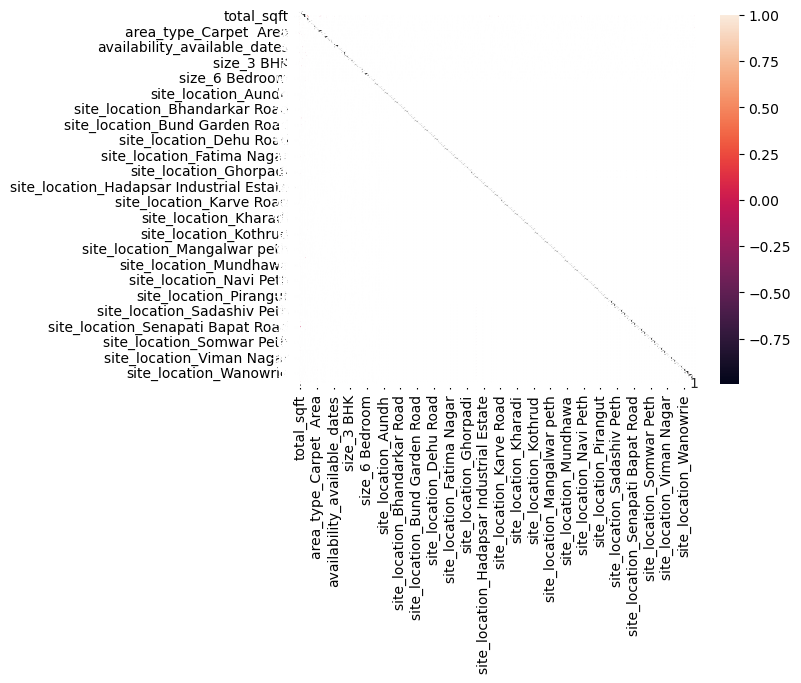

In [56]:
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [57]:
numerics=['int32','int64','float32','float64']
new_df=df.select_dtypes(include=numerics)
new_df

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.000000,39.07
1,1277.0,2.0,3.000000,120.00
2,1440.0,2.0,3.000000,62.00
3,1521.0,3.0,1.000000,95.00
4,1200.0,2.0,1.000000,51.00
...,...,...,...,...
13315,1277.0,4.0,0.000000,231.00
13316,1277.0,2.0,1.584376,400.00
13317,1141.0,2.0,1.000000,60.00
13318,1277.0,4.0,1.000000,488.00


## 2.No-Multicolinearity

0
1
2
3


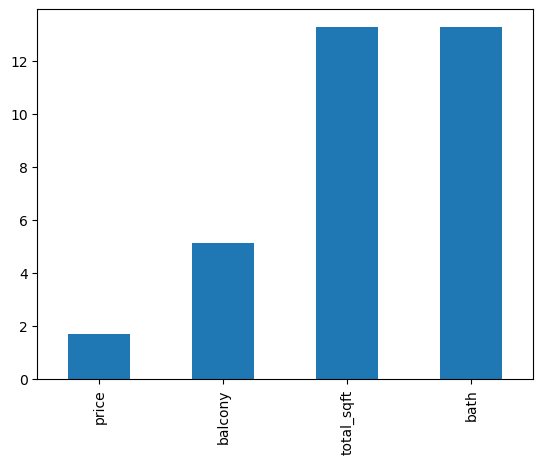

In [58]:
vif_lst = []
for i in range(new_df.shape[1]):
    print(i)
    vif = variance_inflation_factor(new_df,i) 
    vif_lst.append(vif)
    
    
seri = pd.Series(vif_lst,index = new_df.columns)
seri.sort_values().plot(kind='bar')
plt.show()

# Model Building 

In [59]:
x = df.drop("price", axis=1)
y = df['price']


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=5)

## Linear Regression Model

In [60]:
linear_reg_model = LinearRegression()

linear_reg_model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [61]:
# On Training Dataset

y_pred_train=linear_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean squared error---->",mse)

mae=mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error--->",mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Eroor---->",rmse)

r2 = r2_score(y_train, y_pred_train)
print("R2 Scored----->", r2)

Adjusted_r2 = 1 - (((1 - r2) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",Adjusted_r2)

Mean squared error----> 16653.757666321544
Mean Absolute Error---> 52.507423489639095
Root Mean Squared Eroor----> 129.0494388454345
R2 Scored-----> 0.2688811651870444
Adjusted R Squared Value : 0.2606928562929738


In [62]:
# On Testing Dataset

y_pred_test=linear_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("Mean squared error---->",mse)

mae=mean_absolute_error(y_test,y_pred_test)
print("Mean Absolute Error--->",mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Eroor---->",rmse)

r2 = r2_score(y_test, y_pred_test)
print("R2 Scored----->", r2)

adj_r2  = 1 - (((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean squared error----> 14262.298253041941
Mean Absolute Error---> 50.658266603853605
Root Mean Squared Eroor----> 119.42486446733754
R2 Scored-----> 0.28129481256131783
Adjusted R Squared Value : 0.24797174296691138


In [63]:
Residual=y_train-y_pred_train
Residual

10350     5.031570
9887     55.495743
1326    -25.400574
12189     9.247971
7700     65.917664
           ...    
3047      2.318817
9918    -41.253021
4080    -15.431320
2255    -22.227325
2916     26.003074
Name: price, Length: 10655, dtype: float64

# 3.Normality of Residual

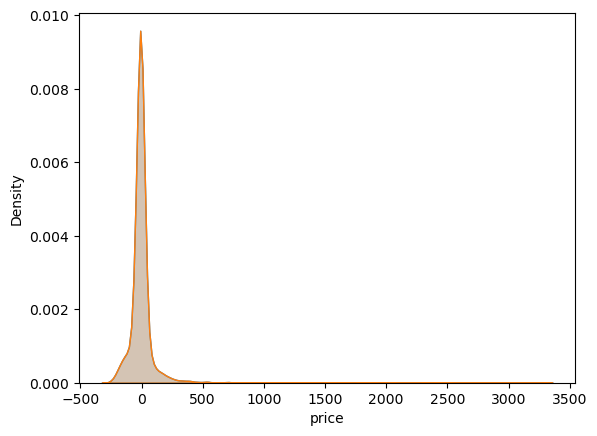

In [72]:
sns.kdeplot(Residual, fill=True)
plt.show()

### Hypothesis Testing

#### 1 Shapiro Test

In [63]:
from scipy.stats import shapiro
_ , p_val = shapiro(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 0.0
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


#### KStest

In [64]:
from scipy.stats import kstest

_ , p_val = kstest(Residual,'norm')

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 0.0
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


#### NormalTest

In [76]:
from scipy.stats import normaltest

_ , p_val = normaltest(Residual)

print("P_Value:",p_val)

if p_val >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
    
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

P_Value: 0.0
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


### 4.QQ-Plot

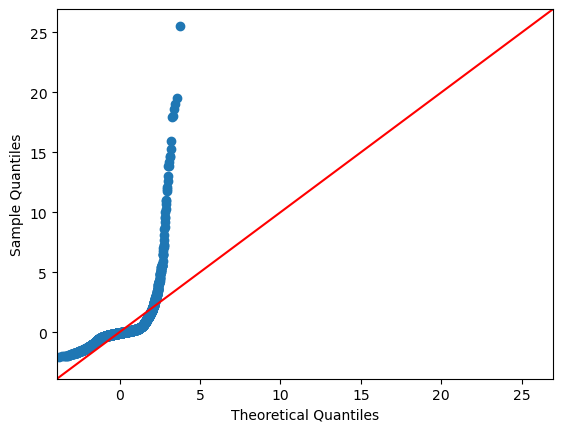

In [77]:
import statsmodels.api as sm
sm.qqplot(Residual,line='45',fit=True)

## 4 Homoscadisticity

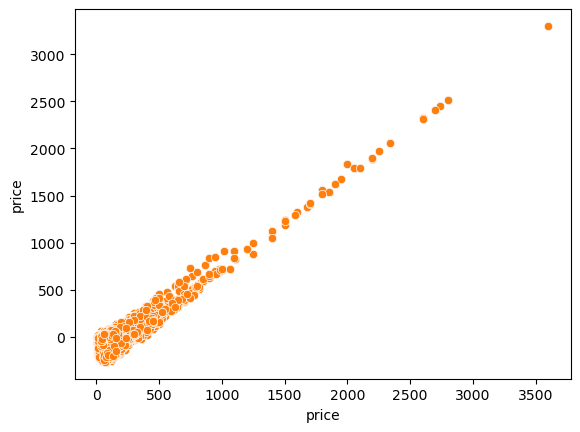

In [81]:
sns.scatterplot(x = y_train, y= Residual)
plt.show()

## Toreduce the variace use Regularization Technique¶


### 1.Ridge Regression

In [82]:
ridge_model=Ridge(alpha=1.0) # default value of alpha

ridge_model.fit(x_train,y_train)

Ridge()

In [83]:
# Evaluation Metrics on ridge model on training dataset

y_pred_train_ridge=ridge_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train_ridge)
print("Mean squared error---->",mse)

mae=mean_absolute_error(y_train,y_pred_train_ridge)
print("Mean Absolute Error--->",mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Eroor---->",rmse)

r2 = r2_score(y_train, y_pred_train_ridge)
print("R2 Scored----->", r2)


Mean squared error----> 16653.809650186256
Mean Absolute Error---> 52.46214140736847
Root Mean Squared Eroor----> 129.04964025593506
R2 Scored-----> 0.26887888303647167


In [84]:
# Evaluation Metrics on ridge model on testing dataset

y_pred_test_ridge=ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test_ridge)
print("Mean squared error---->",mse)

mae=mean_absolute_error(y_test,y_pred_test_ridge)
print("Mean Absolute Error--->",mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Eroor---->",rmse)

r2 = r2_score(y_test, y_pred_test_ridge)
print("R2 Scored----->", r2)


Mean squared error----> 14255.94340768217
Mean Absolute Error---> 50.59228297525236
Root Mean Squared Eroor----> 119.3982554633114
R2 Scored-----> 0.2816150456853491


## 2.Lasso Regularization

In [85]:
lasso_model=Lasso(alpha=1.0)
lasso_model

Lasso()

In [86]:
lasso_model.fit(x_train,y_train)

Lasso()

In [87]:
# Evaluation Metrics by lasso regularization on training dataset

y_pred_train_lasso=lasso_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train_lasso)
print("Mean squared error---->",mse)

mae=mean_absolute_error(y_train,y_pred_train_lasso)
print("Mean Absolute Error--->",mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Eroor---->",rmse)

r2 = r2_score(y_train, y_pred_train_lasso)
print("R2 Scored----->", r2)

Mean squared error----> 17173.424372064484
Mean Absolute Error---> 51.17581994702154
Root Mean Squared Eroor----> 131.0474126874105
R2 Scored-----> 0.2460672078804479


In [88]:
# Evaluation Metrics by lasso regularization on testing dataset


y_pred_test_lasso=lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test_lasso)
print("Mean squared error---->",mse)

mae=mean_absolute_error(y_test,y_pred_test_lasso)
print("Mean Absolute Error--->",mae)

rmse = np.sqrt(mse)
print("Root Mean Squared Eroor---->",rmse)

r2 = r2_score(y_test, y_pred_test_lasso)
print("R2 Scored----->", r2)

Mean squared error----> 14214.748242131534
Mean Absolute Error---> 47.981836334217874
Root Mean Squared Eroor----> 119.2256190679316
R2 Scored-----> 0.283690950890341


## Single user input testing

In [65]:
area_type="Super built-up  Area"    #"area_type_Super built-up Area"
availability="Ready To Move"
size="2 BHK"
total_sqft=1056
bath=2.0
balcony=1.0
site_location="Alandi Road"


area_type="area_type_"+area_type
availability="availability_"+availability
size="size_"+size
site_location="site_location_"+site_location

In [66]:
column_names = x.columns
len(column_names)

118

In [67]:
with open("Pune_linear_model.pkl", "wb") as f:
    pickle.dump(linear_reg_model, f)

In [68]:
json_data = {"columns":list(column_names)}
json_data

{'columns': ['total_sqft',
  'bath',
  'balcony',
  'area_type_Built-up  Area',
  'area_type_Carpet  Area',
  'area_type_Plot  Area',
  'area_type_Super built-up  Area',
  'availability_Immediate Possession',
  'availability_Ready To Move',
  'availability_available_dates',
  'size_1 BHK',
  'size_1 Bedroom',
  'size_2 BHK',
  'size_2 Bedroom',
  'size_3 BHK',
  'size_3 Bedroom',
  'size_4 BHK',
  'size_4 Bedroom',
  'size_5 Bedroom',
  'size_6 Bedroom',
  'size_uncommon_size',
  'site_location_Alandi Road',
  'site_location_Ambegaon Budruk',
  'site_location_Anandnagar',
  'site_location_Aundh',
  'site_location_Aundh Road',
  'site_location_Balaji Nagar',
  'site_location_Baner',
  'site_location_Baner road',
  'site_location_Bhandarkar Road',
  'site_location_Bhavani Peth',
  'site_location_Bibvewadi',
  'site_location_Bopodi',
  'site_location_Budhwar Peth',
  'site_location_Bund Garden Road',
  'site_location_Camp',
  'site_location_Chandan Nagar',
  'site_location_Dapodi',
  'sit

In [72]:
with open("Project_data_pune.json", "w") as f:
    json.dump(json_data, f)

In [73]:
area_type_index = list(column_names).index(area_type)
availability_index = list(column_names).index(availability)

site_location_index = list(column_names).index(site_location)

In [78]:
size_index = list(column_names).index(size)

In [79]:
test_array = np.zeros(len(column_names))

In [80]:
test_array[0] = total_sqft
test_array[1] = bath
test_array[2] = balcony
test_array[area_type_index] = 1
test_array[availability_index] = 1
test_array[size_index] = 1
test_array[site_location_index] = 1

In [81]:
test_array

array([1.056e+03, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [85]:
price = np.around(linear_reg_model.predict([test_array])[0],2)
print("price of the house is :Rs.",price,"lakhs")

price of the house is :Rs. 49.11 lakhs
